In [18]:
import networkx as nx
import matplotlib.pyplot as plt
import numpy as np
import pickle
from collections import Counter
from random import random
plt.rcParams["figure.figsize"] = [30, 30]

In [2]:
with open('graf.pkl', 'rb') as file:
    graf = pickle.load(file)

with open('user_map.pkl', 'rb') as file:
    user_map = pickle.load(file)

In [3]:
# Удалим людей связаных только с одним человеком
np_graf = {}

for key in graf:
    np_graf[key] = np.array(graf[key])

nodes = np.array(list(np_graf.keys()))

for key in list(np_graf.keys()):
    indexes_for_delete = []
    for index, friend in enumerate(np_graf[key]):
        if friend not in nodes:
            indexes_for_delete.append(index)
    np_graf[key] = np.delete(np_graf[key], indexes_for_delete)

In [4]:
G = nx.from_dict_of_lists(np_graf)

# Betweenness centrality

In [5]:
betweenness_centrality = nx.betweenness_centrality(G)
betweenness_centrality_counts = Counter(betweenness_centrality)
th = betweenness_centrality_counts.most_common(25)[-1][1]

In [19]:
show_nodes = [n for n in G.nodes if betweenness_centrality[n] >= th]
show_edges = []
for edge in G.edges():
    if edge[0] in show_nodes and edge[1] in show_nodes:
        show_edges.append(edge)
labels = {n :f"{user_map[n][0]} {user_map[n][1]}" for n in show_nodes}

colors = [(random(), random(), random()) for _i in range(len(show_nodes))]

In [15]:
pos = nx.spring_layout(G, k=40, scale=50, iterations=100)

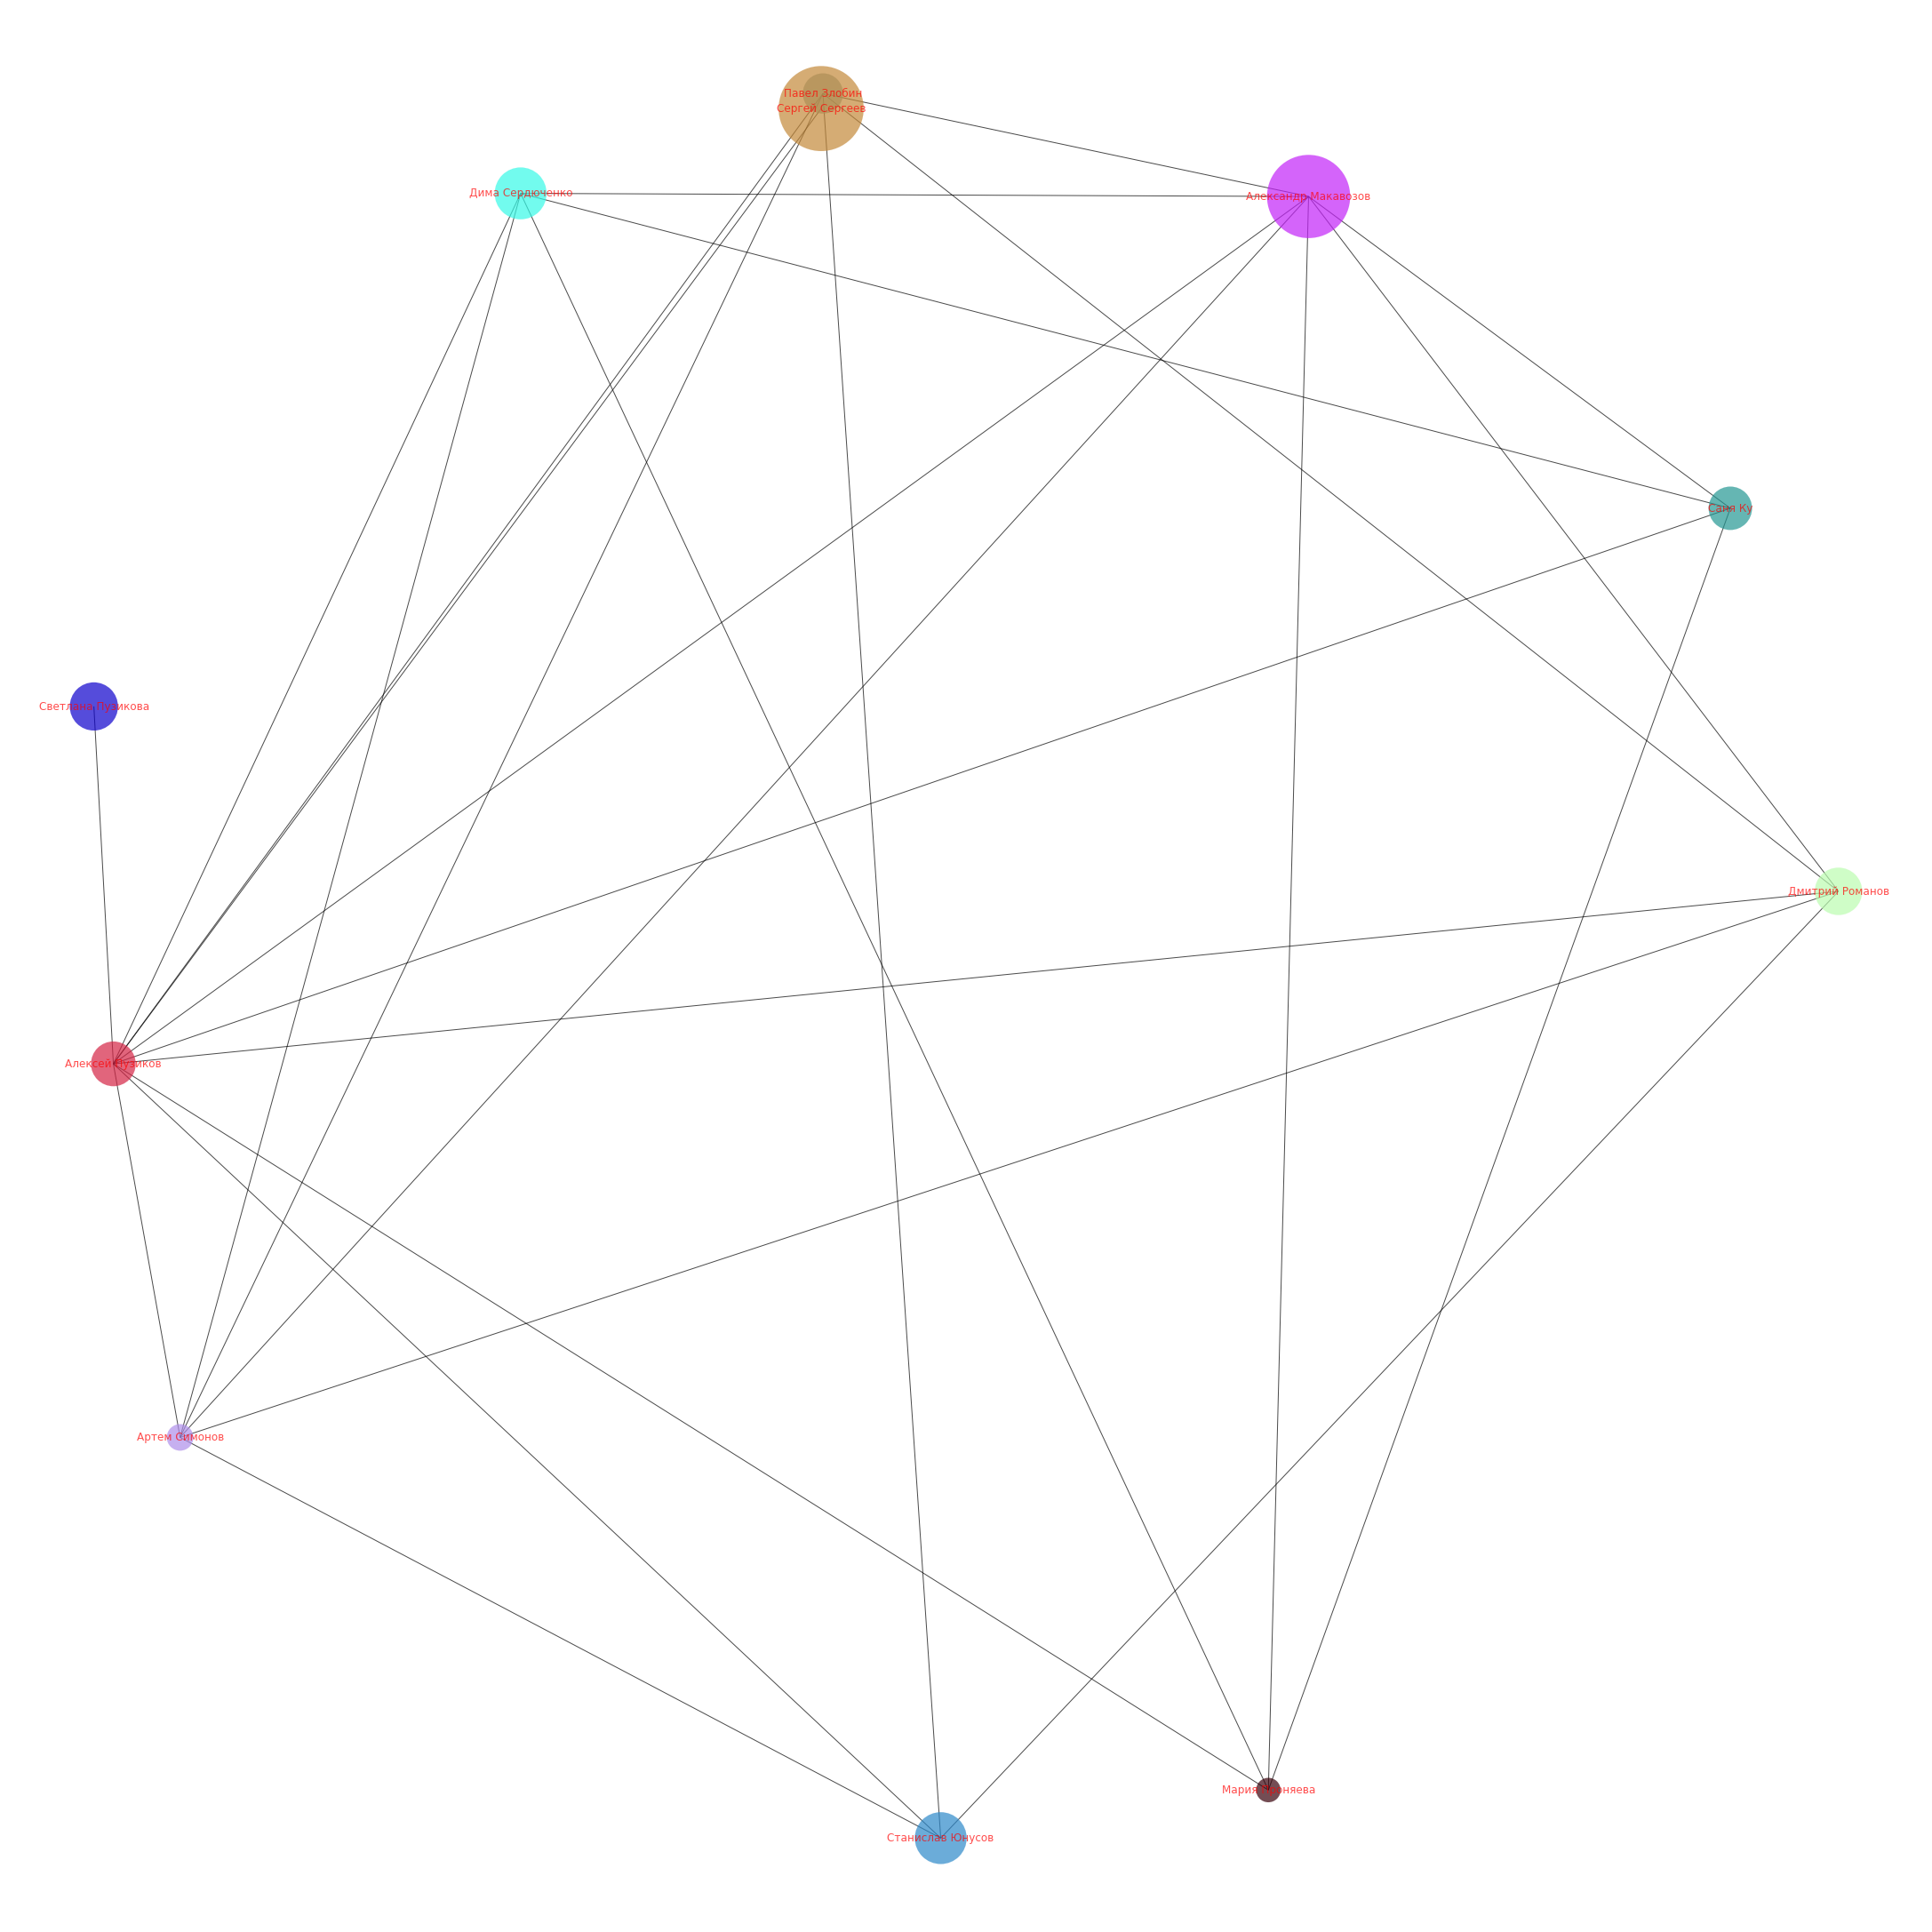

In [20]:
nx.draw(
    G,
    with_labels=True, 
    alpha=0.7, 
    labels=labels, 
    node_size=np.array([betweenness_centrality[node] for node in betweenness_centrality]) * 50000,
    linewidths=0.1,
    nodelist = show_nodes,
    edgelist = show_edges,
    font_color = 'red',
    pos=pos,
    node_color=colors
)

# Closeness centrality

In [9]:
degree_centrality = nx.degree_centrality(G)
degree_centrality_counts = Counter(degree_centrality)
th = degree_centrality_counts.most_common(25)[-1][1]

In [23]:
show_node = [n for n in G.nodes if degree_centrality[n] >= th]
show_edges = []
for edge in G.edges():
    if edge[0] in show_nodes and edge[1] in show_nodes:
        show_edges.append(edge)
labels = {n :f"{user_map[n][0]} {user_map[n][1]}" for n in show_nodes}
colors = [(random(), random(), random()) for _i in range(len(show_nodes))]

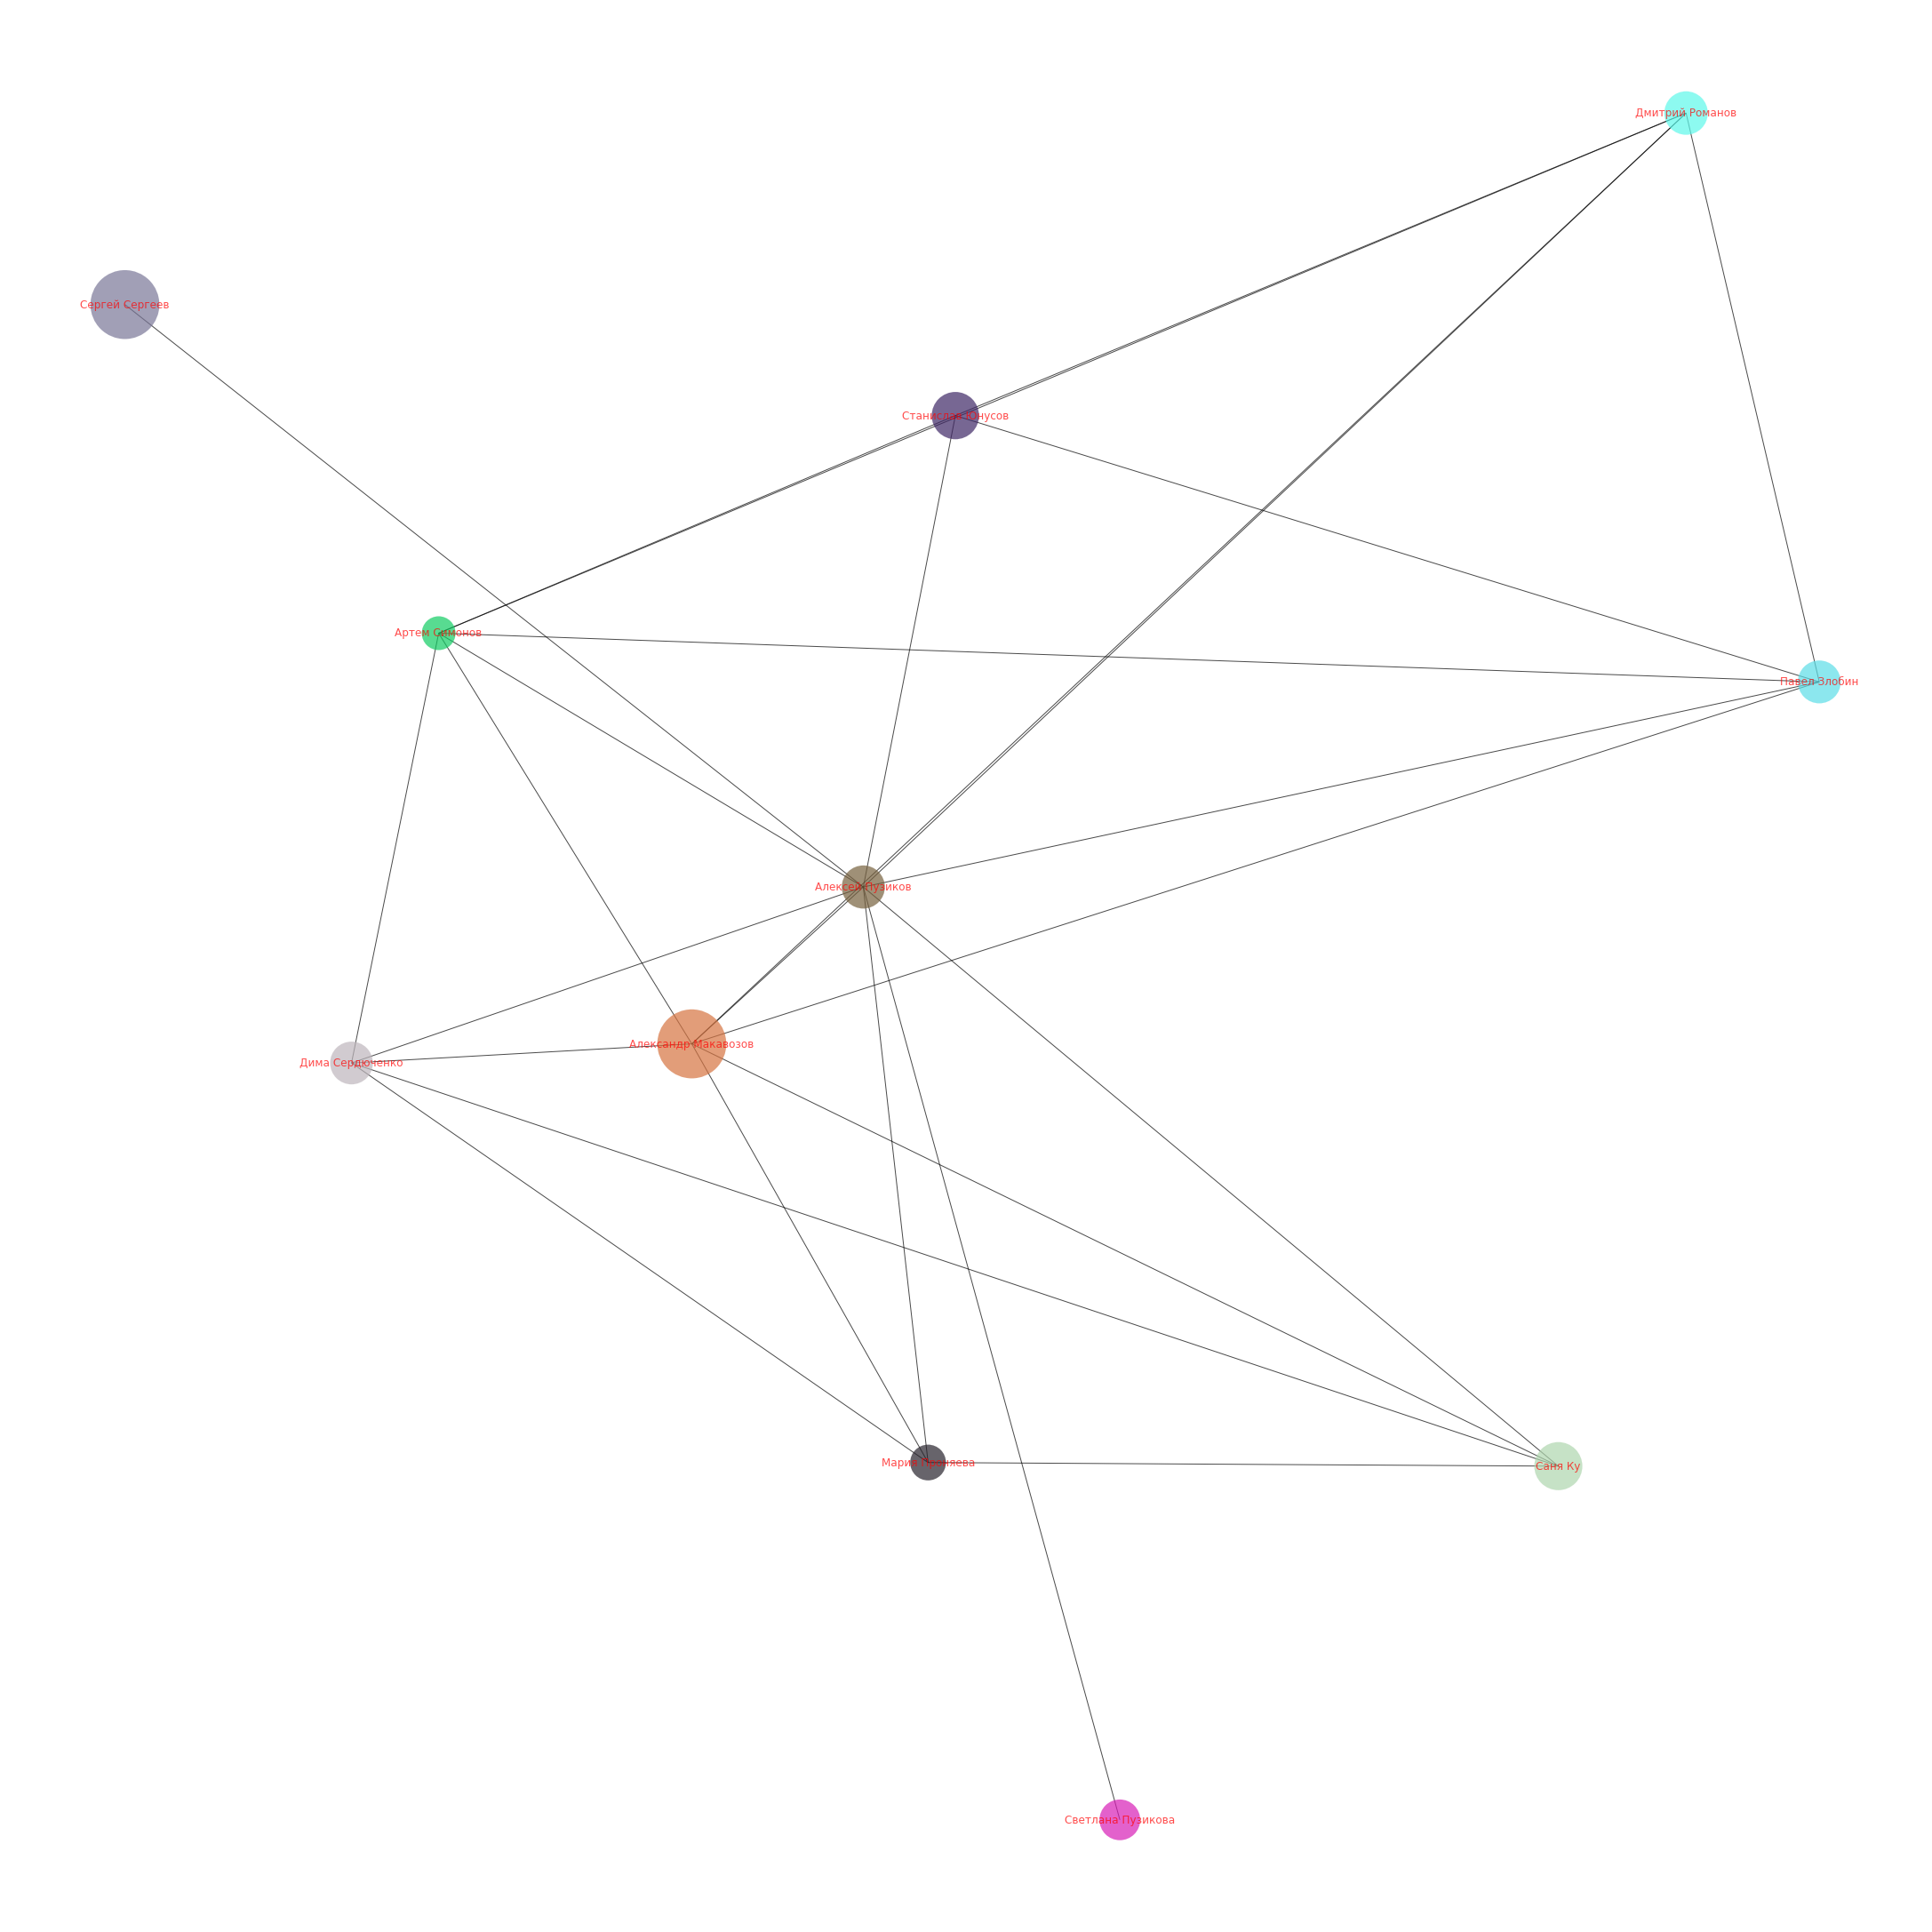

In [25]:
nx.draw(
    G,  
    with_labels=True, 
    alpha=0.7, 
    labels=labels, 
    node_size=np.array([degree_centrality[node] for node in degree_centrality]) * 50000,
    linewidths=0.1,
    nodelist = show_nodes,
    edgelist = show_edges,
    font_color = 'red',
    node_color=colors
)